<a href="https://colab.research.google.com/github/macdonaldchirara/SureStart_VAILTraining/blob/main/HousingPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Uploading dataset to Google Colab


In [1]:

from google.colab import files
files.upload()

Saving housepricedata.csv to housepricedata.csv


{'housepricedata.csv': b'LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice\r\n8450,7,5,856,2,1,3,8,0,548,1\r\n9600,6,8,1262,2,0,3,6,1,460,1\r\n11250,7,5,920,2,1,3,6,1,608,1\r\n9550,7,5,756,1,0,3,7,1,642,0\r\n14260,8,5,1145,2,1,4,9,1,836,1\r\n14115,5,5,796,1,1,1,5,0,480,0\r\n10084,8,5,1686,2,0,3,7,1,636,1\r\n10382,7,6,1107,2,1,3,7,2,484,1\r\n6120,7,5,952,2,0,2,8,2,468,0\r\n7420,5,6,991,1,0,2,5,2,205,0\r\n11200,5,5,1040,1,0,3,5,0,384,0\r\n11924,9,5,1175,3,0,4,11,2,736,1\r\n12968,5,6,912,1,0,2,4,0,352,0\r\n10652,7,5,1494,2,0,3,7,1,840,1\r\n10920,6,5,1253,1,1,2,5,1,352,0\r\n6120,7,8,832,1,0,2,5,0,576,0\r\n11241,6,7,1004,1,0,2,5,1,480,0\r\n10791,4,5,0,2,0,2,6,0,516,0\r\n13695,5,5,1114,1,1,3,6,0,576,0\r\n7560,5,6,1029,1,0,3,6,0,294,0\r\n14215,8,5,1158,3,1,4,9,1,853,1\r\n7449,7,7,637,1,0,3,6,1,280,0\r\n9742,8,5,1777,2,0,3,7,1,534,1\r\n4224,5,7,1040,1,0,3,6,1,572,0\r\n8246,5,8,1060,1,0,3,6,1,270,0\r\n14230,8,5,1566,2,

Importing libraries

In [2]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Reading dataset and showing data

In [3]:
data=pd.read_csv("/content/housepricedata.csv")
data

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


Converting dataset into an array¶


In [5]:
dataset=data.values


In [6]:
dataset


array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

Normalizing data


In [7]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [9]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [10]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

Splitting data

In [11]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [12]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [13]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


First Model

In [14]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
history = model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 13ms/step - loss: 0.7356 - accuracy: 0.5020 - val_loss: 0.7222 - val_accuracy: 0.5114
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7200 - accuracy: 0.4650 - val_loss: 0.7116 - val_accuracy: 0.4840
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7075 - accuracy: 0.4109 - val_loss: 0.7043 - val_accuracy: 0.3059
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7002 - accuracy: 0.3536 - val_loss: 0.6984 - val_accuracy: 0.4201
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4925 - val_loss: 0.6929 - val_accuracy: 0.4932
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.5399 - val_loss: 0.6876 - val_accuracy: 0.4795
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.5024 - val_loss: 0.6819 - val_accuracy: 0.4795
Epoch 8/100


In [16]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.2572 - accuracy: 0.9087


0.9086757898330688

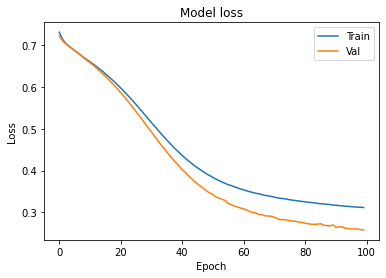

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

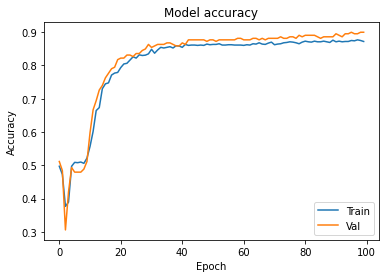

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

Second Model - adding more layers

In [19]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [20]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [21]:
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 41ms/step - loss: 0.5640 - accuracy: 0.7097 - val_loss: 0.3219 - val_accuracy: 0.8767
Epoch 2/100
32/32 [==============================] - 1s 36ms/step - loss: 0.3816 - accuracy: 0.8437 - val_loss: 0.2780 - val_accuracy: 0.8858
Epoch 3/100
32/32 [==============================] - 1s 37ms/step - loss: 0.3282 - accuracy: 0.8602 - val_loss: 0.2605 - val_accuracy: 0.8858
Epoch 4/100
32/32 [==============================] - 1s 35ms/step - loss: 0.3463 - accuracy: 0.8636 - val_loss: 0.2520 - val_accuracy: 0.8950
Epoch 5/100
32/32 [==============================] - 1s 35ms/step - loss: 0.2715 - accuracy: 0.8870 - val_loss: 0.2286 - val_accuracy: 0.8950
Epoch 6/100
32/32 [==============================] - 1s 35ms/step - loss: 0.2751 - accuracy: 0.8834 - val_loss: 0.2333 - val_accuracy: 0.9041
Epoch 7/100
32/32 [==============================] - 1s 36ms/step - loss: 0.2681 - accuracy: 0.9000 - val_loss: 0.2143 - val_accuracy: 0.8995
Epoch 

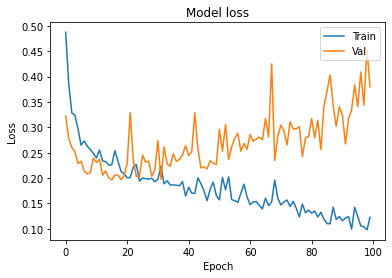

In [22]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

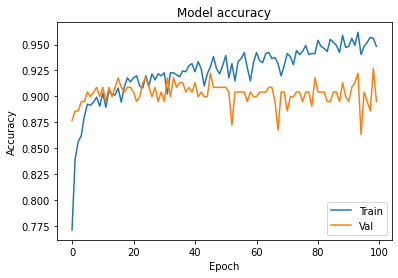

In [23]:

plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

Model 3 - adding regularization and dropout to avoid overfitting

In [24]:
from keras.layers import Dropout
from keras import regularizers
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [25]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 52ms/step - loss: 21.0913 - accuracy: 0.5380 - val_loss: 3.8772 - val_accuracy: 0.8219
Epoch 2/100
32/32 [==============================] - 1s 45ms/step - loss: 2.5105 - accuracy: 0.7978 - val_loss: 0.6030 - val_accuracy: 0.8767
Epoch 3/100
32/32 [==============================] - 1s 45ms/step - loss: 0.6015 - accuracy: 0.8638 - val_loss: 0.4738 - val_accuracy: 0.8813
Epoch 4/100
32/32 [==============================] - 1s 45ms/step - loss: 0.5306 - accuracy: 0.8519 - val_loss: 0.4940 - val_accuracy: 0.8630
Epoch 5/100
32/32 [==============================] - 1s 46ms/step - loss: 0.5024 - accuracy: 0.8667 - val_loss: 0.5464 - val_accuracy: 0.8447
Epoch 6/100
32/32 [==============================] - 1s 46ms/step - loss: 0.5102 - accuracy: 0.8531 - val_loss: 0.4118 - val_accuracy: 0.8904
Epoch 7/100
32/32 [==============================] - 1s 45ms/step - loss: 0.4873 - accuracy: 0.8785 - val_loss: 0.4117 - val_accuracy: 0.9087
Epoch

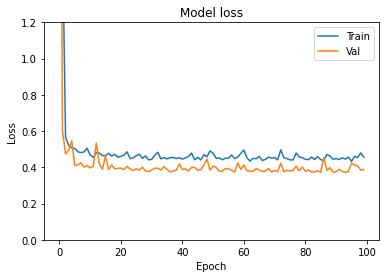

In [26]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

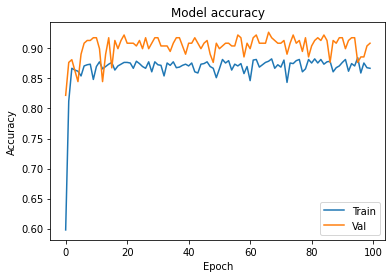

In [27]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()